In [1]:
#import libraries
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt 

In [2]:
import warnings 
warnings. filterwarnings('ignore')

In [19]:
#initialize data, perform linear regression

#define constants
n = 500
m = 11
mu = 0
#sigma_2 = 5
#sigma = np.sqrt(sigma_2)

#create matrices for storing data
x = np.zeros(n)
y = np.zeros(n)

def lineardatagenerator(n):
    random = np.random.uniform(0,1)
    noise = sigma*np.random.randn(n)
    x = np.random.rand(n)
    y = 36 * x + noise
    return x, y

def designmatrix(x_input,m):
    if (m == 1):
        X = np.vstack([np.ones(np.size(x_input)), x_input]).T
        return X
    else:
        X = np.vstack([designmatrix(x_input, m - 1).T, x_input**m]).T
        return X
def designvector(x_input,m):
    if (m == 1):
        X = np.vstack([1, x_input]).T
        return X
    else:
        X = np.vstack([designvector(x_input, m - 1).T, x_input**m]).T
        return X
    
def kernelfunction(x, x_value, index, m):
    dmatrix = designmatrix(x, m)
    dvector = designvector(x_value, m)
    kernel =  dvector @ np.linalg.inv(dmatrix.T @ dmatrix) @ dmatrix[:][index]
    return kernel

Text(0.5, 0, 'K(x,x_i)')

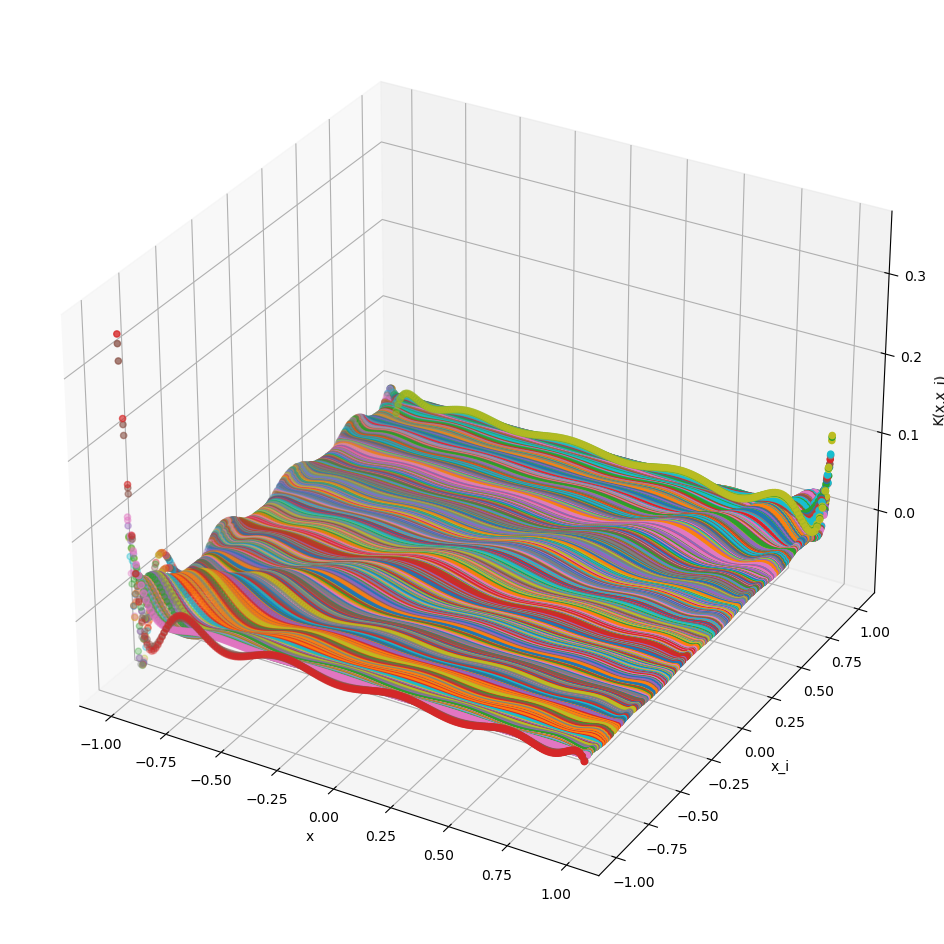

In [25]:
#np.random.seed(seed=4803)
scalefactor = 1

x = 2*scalefactor*np.random.rand(n) - scalefactor

values = np.arange(-scalefactor,scalefactor, 0.01)

kernels = np.zeros((len(values),n))

for i in range(len(values)):
    for j in range(n):
        kernels[i][j] = kernelfunction(x, values[i], j, m)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
for i in range(n):
    ax.scatter(values, x[i], kernels[:,i])
ax.set_xlabel('x')
ax.set_ylabel('x_i')
ax.set_zlabel('K(x,x_i)')

Text(0.5, 0, 'K(x,x_i)')

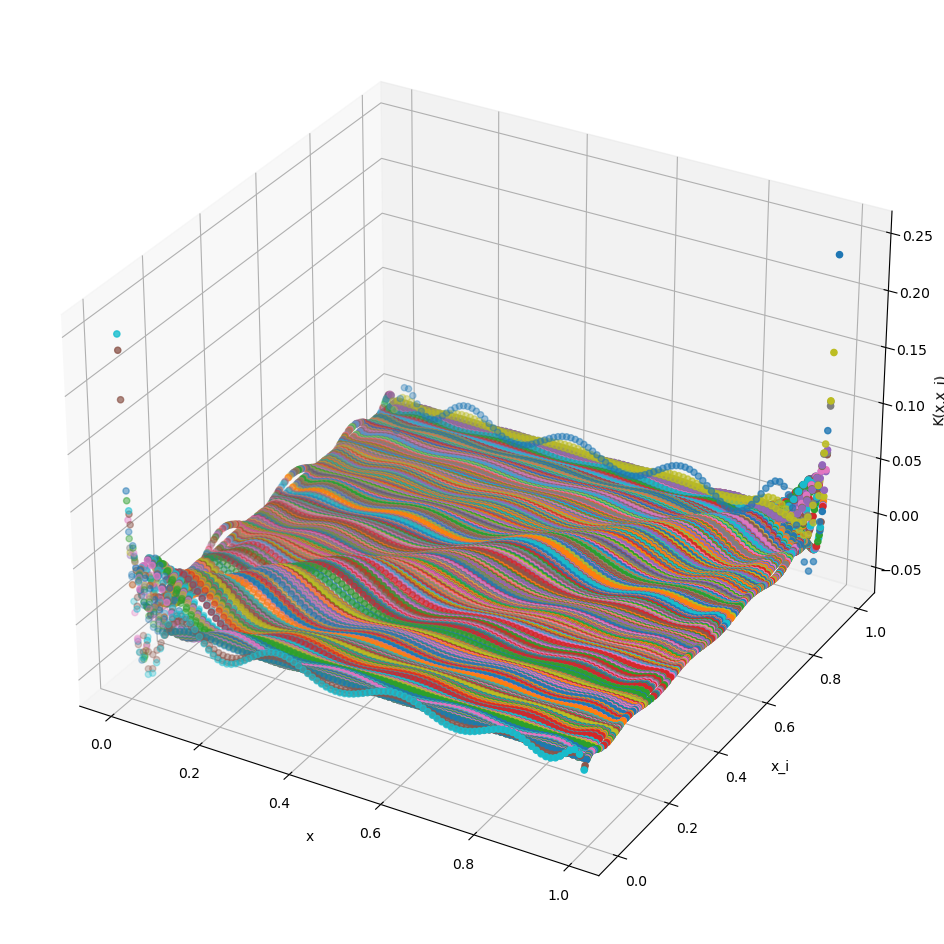

In [21]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
for i in range(n):
    ax.scatter(values, x[i], kernels[:,i])
ax.set_xlabel('x')
ax.set_ylabel('x_i')
ax.set_zlabel('K(x,x_i)')

This function is not the same for all x_i. Clearly, as the above 3d-plot indicates, there seems to be a peak in the value of the kernel function at each value of x_i, so there is some degree of dependence on x_i. 

Let's make some graphs with different polynomial degrees!

Text(0.5, 0, 'K(x,x_i)')

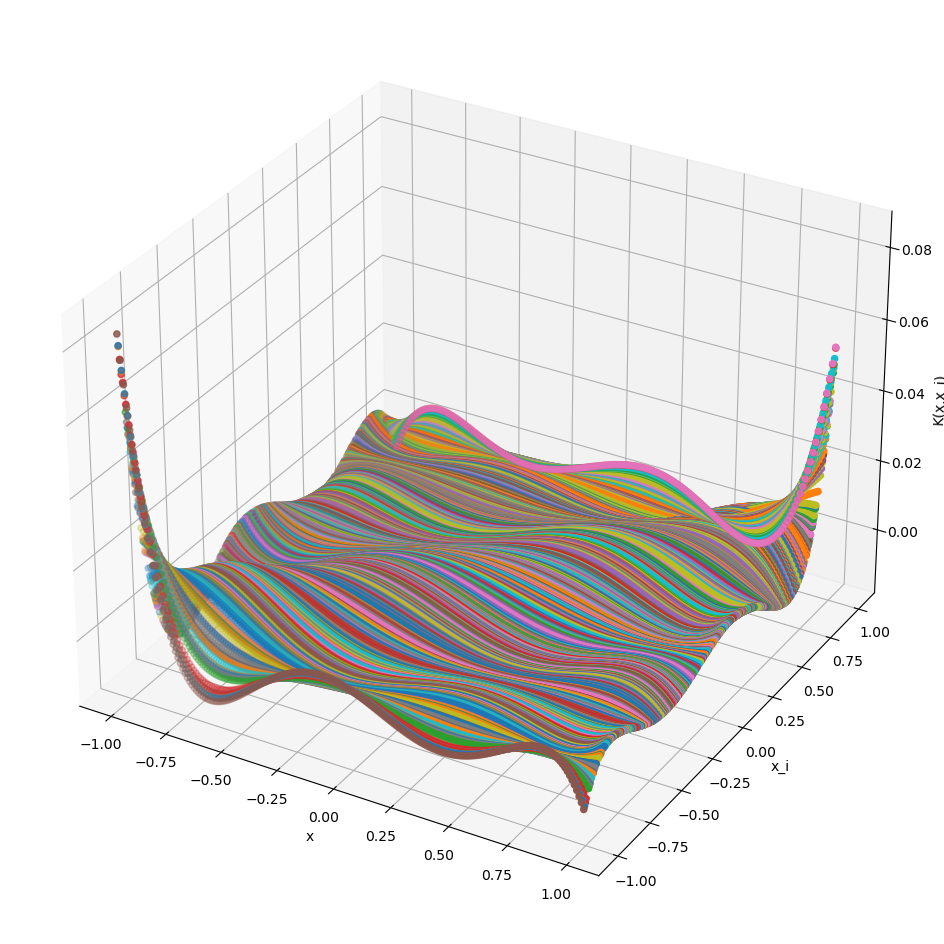

In [66]:
scalefactor = 1
polydeg1 = 5

x = 2*scalefactor*np.random.rand(n) - scalefactor

values = np.arange(-scalefactor,scalefactor, 0.01)

kernels = np.zeros((len(values),n))

for i in range(len(values)):
    for j in range(n):
        kernels[i][j] = kernelfunction(x, values[i], j, polydeg1)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
for i in range(n):
    ax.scatter(values, x[i], kernels[:,i])
ax.set_xlabel('x')
ax.set_ylabel('x_i')
ax.set_zlabel('K(x,x_i)')
#ax.view_init(30, 20)